<a href="https://colab.research.google.com/github/deylia/Dewi_Modul6/blob/main/dewi_analitik_quiz8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [14]:
!pip install googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40714 sha256=f76b5845fdf2338a3c1dccb0a29a1976161de9844dd71c6da3e7507f9fcb918c
  Stored in directory: /root/.cache/pip/wheels/f1/09/77/3cc2f5659cbc62341b30f806aca2b25e6a26c351daa5b1f49a
Successfully built googlemaps


                             OLS Regression Results                             
Dep. Variable:     jarak_ke_pasar_induk   R-squared:                       0.202
Model:                              OLS   Adj. R-squared:                  0.186
Method:                   Least Squares   F-statistic:                     12.16
Date:                  Wed, 07 May 2025   Prob (F-statistic):            0.00105
Time:                          11:43:44   Log-Likelihood:                -168.83
No. Observations:                    50   AIC:                             341.7
Df Residuals:                        48   BIC:                             345.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

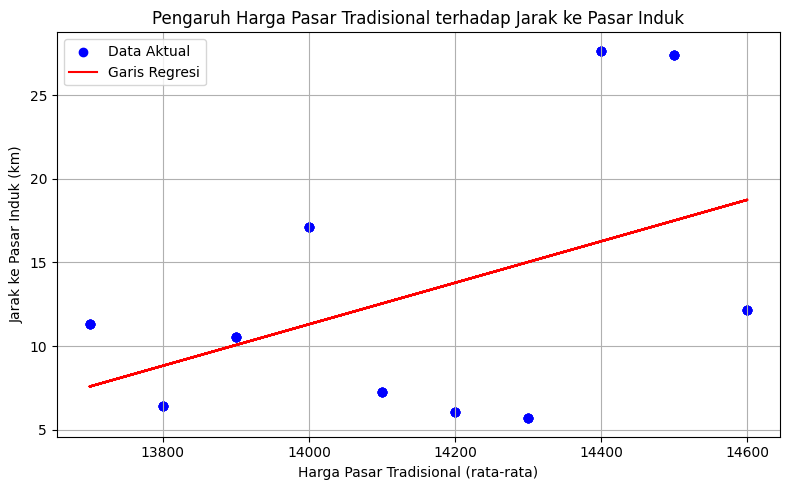

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Dataset
data = {
    'pasar_tradisional': ['Pasar Senen', 'Pasar Minggu', 'Pasar Tebet', 'Pasar Kebayoran Lama', 'Pasar Palmerah',
        'Pasar Cempaka Putih', 'Pasar Jatinegara', 'Pasar Koja', 'Pasar Kalideres', 'Pasar Rawamangun'] * 5,
    'koordinat_pasar_tradisional': [
        (6.1659, 106.8466), (6.2781, 106.8499), (6.2706, 106.8484), (6.2656, 106.7994), (6.1850, 106.7945),
        (6.2077, 106.8544), (6.2289, 106.8739), (6.1485, 106.8913), (6.1350, 106.7669), (6.2327, 106.9019)
    ] * 5,
    'pasar_induk': [
        'Pasar Induk Cipinang', 'Pasar Induk Kramat Jati', 'Pasar Induk Tanah Abang',
        'Pasar Induk Tanjung Priok', 'Pasar Induk Modern Cengkareng', 'Pasar Induk Palmerah',
        'Pasar Induk Perumnas Klender', 'Pasar Induk Ciputat', 'Pasar Induk Bekasi', 'Pasar Induk Pasar Minggu'
    ] * 5,
    'koordinat_pasar_induk': [
        (6.2598, 106.8857), (6.2683, 106.9071), (6.1791, 106.8228), (6.1264, 106.8662), (6.1487, 106.7401),
        (6.2101, 106.7999), (6.2563, 106.9172), (6.3612, 106.7613), (6.2233, 106.9986), (6.3062, 106.8204)
    ] * 5,
    'harga_beras': [
        [13000, 12000, 13500, 14500, 15500], [13100, 12100, 13600, 14600, 15600],
        [13200, 12200, 13700, 14700, 15700], [13300, 12300, 13800, 14800, 15800],
        [13400, 12400, 13900, 14900, 15900], [13500, 12500, 14000, 15000, 16000],
        [13600, 12600, 14100, 15100, 16100], [13700, 12700, 14200, 15200, 16200],
        [13800, 12800, 14300, 15300, 16300], [13900, 12900, 14400, 15400, 16400]
    ] * 5
}

# Buat DataFrame
df = pd.DataFrame(data)

# Fungsi untuk menghitung jarak Haversine (dalam km)
def haversine(coord1, coord2):
    R = 6371  # Radius bumi dalam kilometer
    lat1, lon1 = map(radians, coord1)
    lat2, lon2 = map(radians, coord2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Tambahkan kolom harga rata-rata dan jarak
df['harga_pasar_tradisional'] = df['harga_beras'].apply(np.mean)
df['jarak_ke_pasar_induk'] = df.apply(lambda row: haversine(row['koordinat_pasar_tradisional'], row['koordinat_pasar_induk']), axis=1)

# --- Regresi Linear ---
X = df[['harga_pasar_tradisional']]
y = df['jarak_ke_pasar_induk']

# Tambahkan konstanta
X_sm = sm.add_constant(X)

# Buat model regresi
model = sm.OLS(y, X_sm).fit()

# Tampilkan ringkasan hasil regresi
print(model.summary())

# --- Visualisasi ---
plt.figure(figsize=(8, 5))
plt.scatter(df['harga_pasar_tradisional'], y, color='blue', label='Data Aktual')
plt.plot(df['harga_pasar_tradisional'], model.predict(X_sm), color='red', label='Garis Regresi')
plt.xlabel('Harga Pasar Tradisional (rata-rata)')
plt.ylabel('Jarak ke Pasar Induk (km)')
plt.title('Pengaruh Harga Pasar Tradisional terhadap Jarak ke Pasar Induk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
